## El 2805 Lab 1
By: David Rommedahl, Ning Wang

## Problem 1a:

To model the problem as an MDP we can consider the maze.py code that was used for Lab 0, modifying it to accomodate for the case of the added minotaur.
After modifying the actual maze so that it fits the new description we have to define the state space, action space, transition probabilities and the rewards.


#### State Space
We consider the state space:

\begin{equation}
    \mathcal{S} = \left\{(i,j,m,n): \textrm{such that maze}[i,j]\neq 1 \textrm{ and the cell }(m,n) \textrm{ is any cell within the maze}\right\}.
\end{equation}

This way the indexes $(i,j)$ represent the player's position within the maze and $(m,n)$ represent the minotaur's position, and any combination of these positions within the maze that do not put the player inside of a wall are valid states. The size of the state space is greatly increased from the model of Lab 0, but the model is conceptually simple.

#### Action Space
The action space is the same as for Lab 0:

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$

#### Transition Probabilities
The transition probabilities is the part of this lab where the greatest modification had to be made to the model from Lab 0. The movements of the player are deterministic (if the player chooses to move left the player will move left with probability 1 as long as moving left is a legal move. If it is not a legal move the player will remain in the same position), but the minotaur performs a random walk with the only limitation being that it is not allowed to stay in the same place (it is not allowed to perform a $\textit{Snake}$-esque move of moving out of the maze on one side and reappearing on the other side of the maze either). As each state is defined as the position of the player $\textit{and}$ the position of the minotaur, the state transition probabilities will be random with a probability given by the possible next positions for the minotaur.

For example, if the player makes a legal move to the right and the minotaur is in a position where it is allowed to move in all four directions there are four possible next states for the action $\textit{move right}$, each with a transition probability of $\frac{1}{4}$.

   - If at state $s$ action $a$ does not lead to a wall the transition probability is $\mathbb{P}(s'\mid s, a)=\frac{1}{s_p}$, where $s_p$ is the number of possible next positions for the minotaur.
   - If at state $s$ action $a$ $\textit{does}$ lead to a wall the transition probability is $\mathbb{P}(s\mid s, a)=1$. This means that both the player and minotaur will stay in the same position. The fact that the minotaur does not move in this case does not matter for the implementation.
   - If the player has reached the end state or is eaten by the minotaur ($(i,j)=(m,n)$) the transition probability is $\mathbb{P}(s \mid s, a) = 1$.

#### Rewards

The objective is to find the exit of the maze while avoiding obstacles and not being eaten by the minotaur:

   - If the player walks into an obstacle or is eaten by the minotaur the player receives a reward of $r(s,a)=-100$
   - If the player reaches the end state they receive a reward of $r(s,a)=0$
   - If the player makes a legal move they receive a reward of $r(s,a)=-1$

Since the transition probabilities are random in this implementation the rewards are received after an action is taken, which is consistent with the course litterature.

## Problem 1b:

In problem 1b we are expected to compute a policy which maximizes the probability of exiting the maze using dynamic programming and to illustrate this policy. We have decided to do this by using the methods for simulating and plotting a scenario already implemented for Lab 0, with modifications made to suite our code. 

In [11]:
import maze as mz
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

# Modified maze from lab0. Now corresponding to maze in lab1

maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
env_1 = mz.Maze(maze)

In [6]:
#### Dynamic Programming

# Finite horizon
horizon = 20
method = "DynProg"

# Solve the MDP problem with dynamic programming
V, policy_1 = mz.dynamic_programming(env_1, horizon)

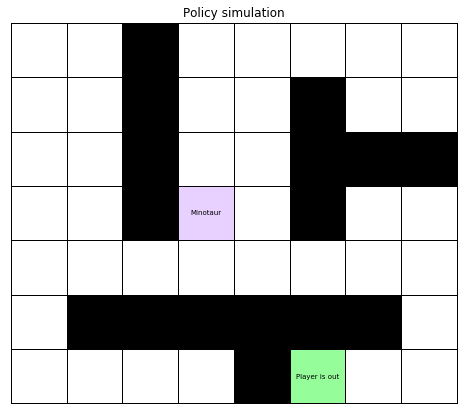

In [7]:


# Simulate the shortest path starting from position A
start = (0, 0, 6, 5)
path_1 = env_1.simulate(start, policy_1, method)

# Show the shortest path
mz.animate_solution(maze, path_1)

## Problem 1c:

The next problem is to vary the time horizon, $T = 1,\dots,30$. For each $T$, a policy which maximizes the probability of exiting the maze should be found, and the probability should be plotted. Finally, the case when the minotaur is allowed to stand still should also be considered.

#### Minotaur cannot stand still

In [4]:
exit_probability_must_move = np.empty(30)

for horizon in range(1, 31):
    V, policy = mz.dynamic_programming(env_1, horizon)
    exit_probability_must_move[horizon-1] = mz.policy_evaluation(env_1, policy, horizon)

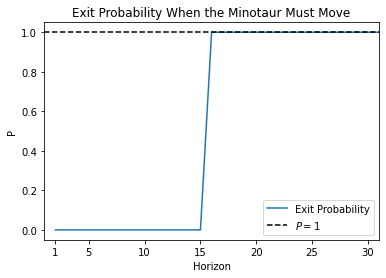

In [5]:
plt.plot(np.arange(1,31),exit_probability_must_move, label="Exit Probability")
plt.plot(np.ones(31), linestyle="--", color="k", label="$P=1$")
plt.legend()
plt.title("Exit Probability When the Minotaur Must Move")
plt.ylabel("P")
plt.xlabel("Horizon")
plt.xlim([0, 30])
plt.xticks([1, 4, 9, 14, 19, 24, 29], labels=[1,5,10,15,20,25,30])
plt.show()

#### Analysis
Clearly the player has found an optimal policy which garantees them to leave the maze in 15 timesteps.

#### The Minotaur is Allowed to Stand Still

In [6]:
env_2 = mz.Maze(maze, stand_still=True)
exit_probability_stand_still = np.empty(30)

for horizon in range(1, 31):
    V, policy = mz.dynamic_programming(env_2, horizon)
    exit_probability_stand_still[horizon-1] = mz.policy_evaluation(env_2, policy, horizon)

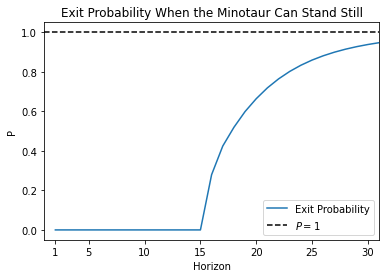

In [7]:
plt.plot(np.arange(1,31),exit_probability_stand_still, label="Exit Probability")
plt.plot(np.ones(31), linestyle="--", color="k", label="$P=1$")
plt.legend()
plt.title("Exit Probability When the Minotaur Can Stand Still")
plt.ylabel("P")
plt.xlabel("Horizon")
plt.xlim([0, 30])
plt.xticks([1, 4, 9, 14, 19, 24, 29], labels=[1,5,10,15,20,25,30])
plt.show()

#### Analysis
If the minotaur is allowed to stand still there are more considerations for the player to make when choosing their route, and they are less likely to exit the maze. We see that the probability grows towards 1 when the time horizon becomes longer, but there is always a risk that the player gets stuck. Below is a simulation of one of these scenarios, when the horizon is 30 and the minotaur is allowed to stand still.

In [8]:
path_2 = env_2.simulate(start, policy, method)

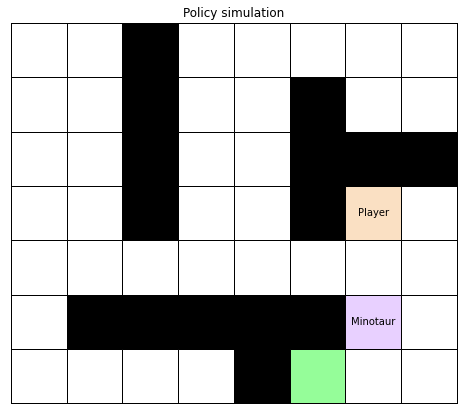

In [9]:
mz.animate_solution(maze, path_2)

## Problem 1d
#### Player is poisoned

If the player is poisoned and their life is geometrically distributed with mean 30, the probability of the player dying after k timesteps is $(1-p)^{k-1}p$, where $\frac{1}{p}=30$. This gives us that the probability of dying at each individual timestep is given by $p = \frac{1}{30}$.

The main modification to the problem that is needed is to include a new, absorbing, "Dead" state. The transition probability to this new state for any $(s,a)$ pair is $p$ and the reward for ending up in this state is the same as for walking into a wall or being caught by the minotaur, $-100$. 

The $\gamma$- parameter must be set high enough that the agent is motivated to find the exit. We have chosen to set it to 29/30. If $\gamma$ is set too low the player will not know what to do, and will simply stay in place. 

Below is a simulation for the case when the agent is poisoned, and the minotaur is allowed to stand still.



In [10]:
env_3 = mz.Maze(maze, stand_still=True, life_mean=30)
V,policy_3 = mz.value_iteration(env_3, 1/3, epsilon=0.0001)

In [11]:
method = 'ValIter'
start = (0,0,6,5)
path_3 = env_3.simulate(start, policy_3, method)

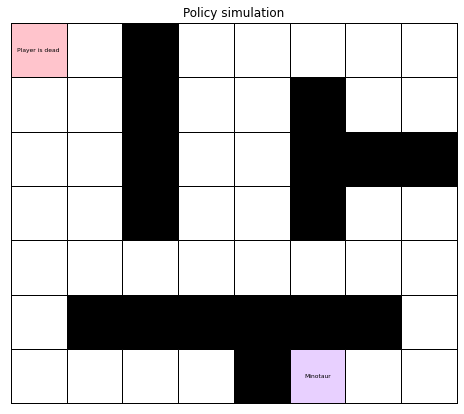

In [12]:
mz.animate_solution(maze, path_3)

## Problem 1e

To calculate the probability of exiting the maze while poisoned, it is easier to consider the case when the minotaur is not allowed to stand still, as we have previously seen that the agent is guaranteed to exit the maze in 15 timesteps for this case (unless they die of poisoning). The probability of this is simply the probability of not dying within 15 timesteps, and this can be calculated using the CDF of the geometric distribution:

$$CDF_{geometric}(k) = 1 - (1-p)^k\;.$$

The CDF gives us the probability of dying within the first k timesteps, so to calculate the probability of getting out alive we use

$$1 - CDF_{geometric}(15) = (1-p)^{15} \approx 0.6014\;.$$

If we estimate this probability by simulating $N = 10000$ attempts we get:

In [13]:
env_4 = mz.Maze(maze, stand_still=False, life_mean=30)
V,policy_4 = mz.value_iteration(env_4, 1/3, epsilon=0.0001)

nr_escape = 0
start = (0,0,6,5)
method = 'ValIter'
N = 10000
for i in range(N):
    path_4 = env_4.simulate(start, policy_4, method)
    if path_4[-1] != "Dead":
        if maze[path_4[-1][0:2]] == 2 and path_4[-1][0:2] != path_4[-1][2:]:
            nr_escape+=1
print("Estimated probability of successful escape:")
print(nr_escape/N)

Estimated probability of successful escape:
0.6078


We see that this value is close to the theoretically calculated one. 

If the minotaur is allowed to stand still this calculation becomes more involved, and we will not perform the theoretical calculations. However, we do know that the probability of getting out alive is lower if the minotaur is allowed to stand still. This should be reflected in the estimated probability if we simulate this scenario $N=10000$ times:

In [10]:
env_5 = mz.Maze(maze, stand_still=True, life_mean=30)
V,policy_5 = mz.value_iteration(env_5, 1/3, epsilon=0.0001)

nr_escape = 0
start = (0,0,6,5)
method = 'ValIter'
N = 10000
for i in range(N):
    path_5 = env_5.simulate(start, policy_5, method)
    if path_5[-1] != "Dead":
        if maze[path_5[-1][0:2]] == 2 and path_5[-1][0:2] != path_5[-1][2:]:
            nr_escape+=1
print("Estimated probability of successful escape:")
print(nr_escape/N)

KeyboardInterrupt: 

## Problem 1f
#### Theoretical questions

1) What does it mean that a learning method is on or off-policy?

  - An off-policy method learns a $Q(s,a)$ function using a behavior policy $\pi_b$, and then uses a greedy policy with respect to the learned $Q(s,a)$. The resulting policy is as a rule different from the behavior policy used. An off-policy works under the condition that the behavior policy explores all state-action pairs.
  - An on-policy algorithm learns the value of a policy which is the same policy used to generate data. At each timestep and state, the algorithm acts according to the best policy it has access to at that time.

2) State convergence requirements for Q-learning and SARSA:

  - For Q-learning the requirements are that the behavior policy $\pi_b$ visits every state-action pair $(s,a)$ infinitely often and that the learning rate $\alpha$ fulfills the following conditions:
    $$\sum_t\alpha = \infty$$$$\sum_t\alpha^2 < \infty$$
  - Requirements on the learning rate are the same for the SARSA algorithm as for the Q-learning algorithm. If the policy $\pi_t$ is $\epsilon$-greedy wrt $Q^{(t)}$, we have the convergence
  $$\lim_{n\to\infty}Q^{(t)} = Q^{\bar{\pi}}$$
    where $Q^{\bar{\pi}}$ is the best policy among all of the possible $\epsilon$-greedy policies.

## Problem 1g

The modifications that are needed to the problem are as follows:
  - The player's life is geometrically distributed with mean 50 instead of mean 30
  - The minotaur's policy for moving has changed. It now moves randomly or deterministically "towards" the player with probability 65% and 35% respectively
  - There are keys located in position C, meaning that the player needs to reach this position before they are able to exit the maze

#### New mean of life distribution

The first modification is trivial, and will not require alterations to the code other than the life_mean parameter given to the environment and the gamma parameter of the value iteration algorithm.

#### New minotaur policy

The minotaur's new policy will require alterations to the transition probabilities, however. Consider the following scenario:

The player has chosen action $a$, and the minotaur is in a location where it is not restricted in which action it is able to make. It has the choice of moving in either direction. Out of these four actions, if the player and the Minotaur are not in the same row or column, two of them will result in decreasing the distance (euclidian or manhattan distance) between the minotaur and the player (otherwise there will only be one). We call these two actions $a_1$ and $a_2$. Given that the minotaur decides to move towards the player, the probability of $a_1$ or $a_2$ is $0.5$ each. Not that all the following probabilities are under the condition that at the next step the player will still be alive. We write:

$$\mathbb{P}(a_1\mid towards)=\mathbb{P}(a_2\mid towards)=0.5$$
$$\mathbb{P}(a_i\mid towards)=0, \; \forall \; i \in \left\{3,4\right\}$$

If the minotaur moves at random we have a uniform probability of choosing any action:

$$\mathbb{P}(a_i \mid random) = \tfrac{1}{4}, \; \forall \; i \in \left\{1,2,3,4\right\}$$

Now, to get the total probability of the minotaur choosing any action $a_i$, we marginalize:

$$\mathbb{P}(a_i) = \mathbb{P}(a_i \mid towards)\mathbb{P}(towards) + \mathbb{P}(a_i \mid random)\mathbb{P}(random)\;.$$

For actions $a_1$ and $a_2$ this becomes:

$$\mathbb{P}(a_1) = 0.5 \cdot 0.35 + 0.25 \cdot 0.65 = 0.3375 = \mathbb{P}(a_2) \;.$$

If there is only one action $a_1$ to move towards the player, the probability will be

$$\mathbb{P}(a_1) = 1 \cdot 0.35 + 0.25 \cdot 0.65 = 0.5125 \;.$$

For other actions ($a_3$ for example), the probability will be

$$\mathbb{P}(a_3) = 0.25 \cdot 0.65 = 0.1625 \;.$$

In this way, with consideration to the possible actions of the minotaur, the knew state transition probabilities can be found for an arbitrary distribution between the cases of moving randomly or towards the player.

#### Introduction of keys

The introduction of keys in position C could be solved by adding an extra dimension to the state space, indicating whether the keys have been found or not. The rewards will remain mostly the same, taking a legal step will be associated with a reward of -1 and walking into a wall, being eaten or dying of poison will be rewarded with -100. If the keys have not yet been found (the player has not yet been in position C), the reward for reaching the end position B will also be associated with a reward of -1, however. As soon as the player reaches position C and finds the keys the exit position B will again be associated with a zero reward. In this way, the player should learn to first visit C and then proceed to B.

## Problem 1h

In [2]:
# Modified maze from lab0. Now corresponding to maze in lab1

maze_2 = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

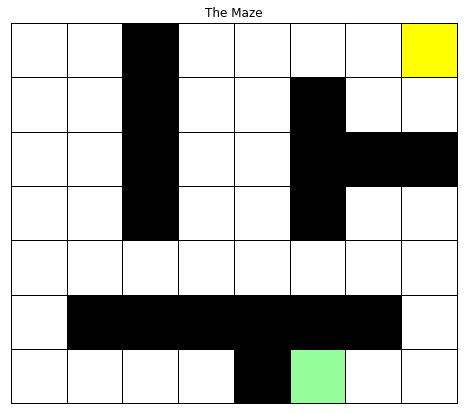

In [3]:
import maze_keys as mz_k
mz_k.draw_maze(maze_2)

In [4]:
env_6 = mz_k.Maze(maze_2, life_mean=50, prob_random=0.65)

In [5]:
V,policy_6 = mz_k.value_iteration(env_6, 0.9, epsilon=0.01)

In [6]:
print(policy_6)

[0 0 2 ... 0 0 0]


In [7]:
method = 'ValIter'
start_6 = (0,0,6,5,0)
path_6 = env_6.simulate(start_6, policy_6, method)

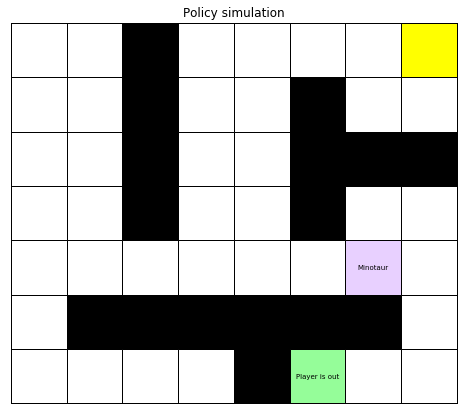

In [9]:
mz_k.animate_solution(maze_2, path_6)

#### Verification of environment

Using the theoretical calculations presented previously for the case when the minotaur is not allowed to stand still, an exact probability of exiting the maze can be obtained. The minimum amount of steps taken to exit the maze is $29$ with the addition of the keys, and using the $CDF$ with $p = \tfrac{1}{50}$ we can calculate the probability of escaping as:

$$\mathbb{P}(escape) = (1-p)^{29} \approx 0.5567 \;.$$

Below is an estimation of this value using $N=10000$ simulations:

In [ ]:
nr_escape = 0
method = 'ValIter'
N = 10000
for i in range(N):
    path_7 = env_6.simulate(start_6, policy_6, method)
    if path_7[-1] != "Dead":
        if maze[path_7[-1][0:2]] == 2 and path_7[-1][0:2] != path_7[-1][2:] and path_7[-1][-1]==1:
            nr_escape+=1
print("Estimated probability of successful escape:")
print(nr_escape/N)


#### Analysis
We see, again, that the estimated value is close to the theoretically calculated one, and conclude that the environment seems to function as it should

## QLearning


In [9]:
# Modified maze from lab0. Now corresponding to maze in lab1

maze_Q = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

import maze_keys as mz_k
from QLearning import qlearning

In [3]:
env_Q = mz_k.Maze(maze_Q, life_mean=50, prob_random=0.65)
epsilon = 0.5
Q, policy_Q, V_convergence = qlearning(env_Q, epsilon, gamma = 0.9, N=50000)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
Nr of times initial state has been visited
[ 9346.  6312.  9329.  6441. 32896.]


In [12]:
method = 'ValIter'
start_Q = (0,0,6,5,0)
path_Q = env_Q.simulate(start_Q, policy_Q, method)

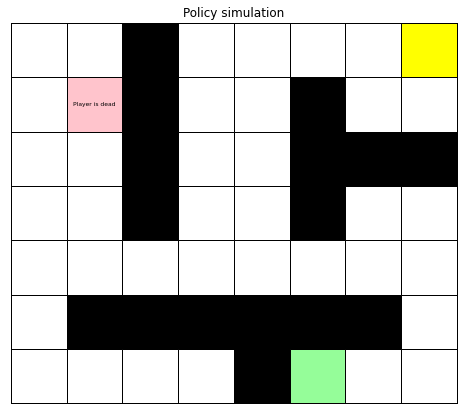

In [13]:
mz_k.animate_solution(maze_Q, path_Q)

In [17]:
print(env_Q.rewards[env_Q.map[(2,1,2,1,0)], 1])

-100.0


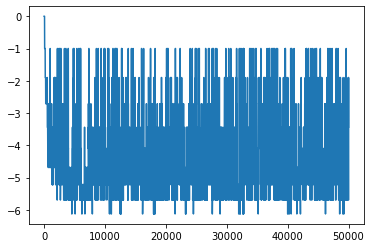

In [15]:
plt.plot(V_convergence)
plt.show()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
Nr of times initial state has been visited
[ 6908.  1056.  6655.   991. 36846.]


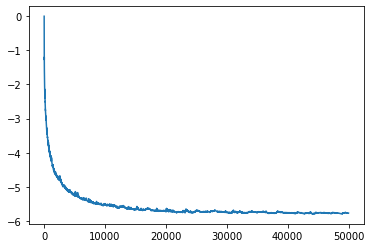

In [10]:
env_Q = mz_k.Maze(maze_Q, life_mean=50, prob_random=0.65)
epsilon = 0.1
Q, policy_Q, V_convergence = qlearning(env_Q, epsilon, gamma = 0.9, N=50000)
plt.plot(V_convergence)
plt.show()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
Nr of times initial state has been visited
[ 4357.  1075. 10218.  1068. 35816.]


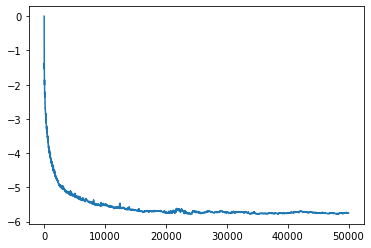

In [8]:
env_Q = mz_k.Maze(maze_Q, life_mean=50, prob_random=0.65)
epsilon = 0.1
Q, policy_Q, V_convergence = qlearning(env_Q, epsilon, gamma = 0.9, N=50000)
plt.plot(V_convergence)
plt.show()

In [9]:
method = 'ValIter'
start_Q = (0,0,6,5,0)
path_Q = env_Q.simulate(start_Q, policy_Q, method)

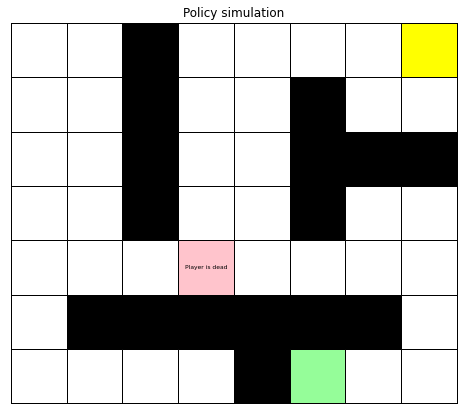

In [10]:
mz_k.animate_solution(maze_Q, path_Q)

## Problem 1i

## SARSA
1) pseudo code:
Parameter. Step sizes ($\alpha_{t}$), Discount factor ($\gamma$), random exploration probability ($\epsilon$)
1. Initialization. Select a Q-function $Q^{(0)} \in \mathbb{R}(S \times A)$, which can be initialized as the reward.
2. Observations. $(s_{t}, a_{t}, r_{t}, s_{t+1}, a_{t+1})$ under $\pi_{t}$ $\epsilon$-greedy w.r.t.$Q^{(t)}$
3. Q-function improvement. For $t ≥ 0$. Update the estimated
Q-function as follows:
$$ \forall s, a, Q^{(t + 1)}(s, a) = Q^{(t)}(s, a) + 1_{(s_{t}, a_{t}) = (s, a)} \frac{1}{n(s, a)^{\alpha}}[r_{t} + \gamma (Q^{(t + 1)}(s_{t + 1}, a_{t + 1}) - Q^{(t)}(s_{t}, a_{t}))]$$

In [12]:
import maze_keys as mz_k
import sarsa

maze_S = np.array([
        [0, 0, 1, 0, 0, 0, 0, 3],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 1, 1],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 2, 0, 0]
    ])

env_S = mz_k.Maze(maze_S, life_mean=50)

2)Solve for $\epsilon = 0.2$, initialize $Q$ with rewards:

0 -1.0
1000 -7.5622800702196376
2000 -10.942688434340406
3000 -13.60598417291507
4000 -15.070097557219233
5000 -16.12497898354279
6000 -16.85841392632718
7000 -17.505420944376844
8000 -17.71046807536065
9000 -18.49730850262445
10000 -19.4216460779442
11000 -19.61087474918047
12000 -19.759640227879075
13000 -19.96542926477708
14000 -20.66853190726569
15000 -21.291278404908677
16000 -20.735090901393455
17000 -20.512592836352407
18000 -21.056568878600903
19000 -21.48351641562578
20000 -21.815439832428936
21000 -21.390950712527246
22000 -22.16740072381451
23000 -21.75968984685848
24000 -21.938864382441103
25000 -21.91809339545071
26000 -22.09868209366651
27000 -22.389796028535727
28000 -22.44565961930603
29000 -21.982578974947973
30000 -22.397698634685785
31000 -22.892543317423232
32000 -22.553694998492084
33000 -22.61104272788423
34000 -22.16315856118822
35000 -22.02278683458442
36000 -22.62707001388612
37000 -23.038758841779522
38000 -23.048689293435363
39000 -22.948910851788785
40000 -2

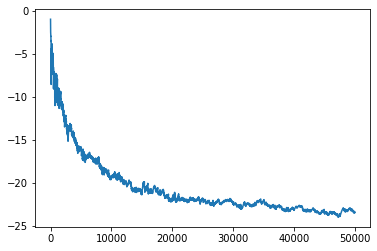

In [3]:
agent = sarsa.SarsaAgent(env_S, alpha=2/3, gamma=0.9, epsilon=0.2)
start_S = (0, 0, 6, 5, 0)
N = 50000
V_convergence = np.empty(N)
for i in range(N):
    path_S, policy, Q = env_S.sarsa_learning(start_S, sarsa_agent=agent)
    V_convergence[i] = max(Q[env_S.map[(0, 0, 6, 5, 0)], :])
    if i % 1000 == 0:
        print(i, V_convergence[i])
plt.plot(V_convergence)
plt.show()

Solve for $\epsilon = 0.1$, initialize $Q$ with rewards:

0 -1.0
1000 -8.905708431626612
2000 -11.17445389061661
3000 -13.560335248168784
4000 -14.471167182284479
5000 -16.53203209056839
6000 -16.017449720573136
7000 -16.90068337360395
8000 -17.369161715717006
9000 -17.940653104241395
10000 -18.44997341674752
11000 -18.605703478745024
12000 -18.98432191716856
13000 -19.042916723861772
14000 -19.319737691181142
15000 -20.48482835286547
16000 -19.92692834602329
17000 -19.992956560150002
18000 -20.02138630476373
19000 -21.04972153126129
20000 -20.976472569909024
21000 -21.076828215153427
22000 -21.233220610192326
23000 -21.247989059014472
24000 -21.472190211266476
25000 -21.422114596224944
26000 -21.34707547294713
27000 -21.836128986166788
28000 -21.83856760232182
29000 -21.74277353127011
30000 -21.617677562516242
31000 -22.003014518755965
32000 -21.858506500563212
33000 -21.601565065849403
34000 -21.555443871354623
35000 -21.880828376022706
36000 -22.251359001703733
37000 -22.24243582819834
38000 -22.166723693716285
39000 -22.094238257506337
40

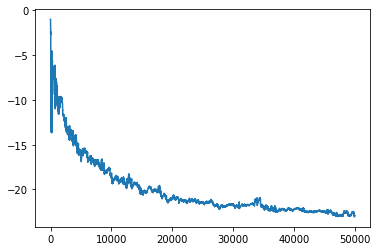

In [4]:
agent = sarsa.SarsaAgent(env_S, alpha=2/3, gamma=0.9, epsilon=0.1)
start_S = (0, 0, 6, 5, 0)
N = 50000
V_convergence = np.empty(N)
for i in range(N):
    path_S, policy, Q = env_S.sarsa_learning(start_S, sarsa_agent=agent)
    V_convergence[i] = max(Q[env_S.map[(0, 0, 6, 5, 0)], :])
    if i % 1000 == 0:
        print(i, V_convergence[i])
plt.plot(V_convergence)
plt.show()

Solve for $\epsilon = 0.2$, initialize $Q$ with zero matrix:

0 0.0
1000 -4.244295041947521
2000 -5.017161873587471
3000 -5.579110590427155
4000 -5.876273331591904
5000 -6.159203518694977
6000 -6.4609661303633805
7000 -6.639157649773183
8000 -6.821473508187943
9000 -6.962732350534483
10000 -7.088792768916399
11000 -7.229542731143703
12000 -7.347971064692894
13000 -7.472815284749932
14000 -7.5157549544699735
15000 -7.453469866496201
16000 -7.671429416278697
17000 -7.731724912506794
18000 -7.764770430849486
19000 -7.739669746075689
20000 -7.851378866262791
21000 -7.898658148285577
22000 -7.958291588700298
23000 -7.981920877490696
24000 -8.028222799355902
25000 -7.998476657029
26000 -8.070693499905323
27000 -8.131081429068116
28000 -8.13977766639834
29000 -8.126803825146778
30000 -8.20879321550263
31000 -8.221352821143729
32000 -8.247525445451926
33000 -8.271977941560722
34000 -8.2899077393255
35000 -8.288526968908988
36000 -8.252882100614007
37000 -8.342773842212377
38000 -8.382720322856756
39000 -8.387182976924786
40000 -8.41438680319224
41000 -8.

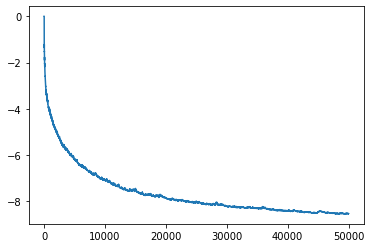

In [8]:
agent = sarsa.SarsaAgent(env_S, alpha=2/3, gamma=0.9, epsilon=0.2)
agent.Q = np.zeros((env_S.n_states, env_S.n_actions))
start_S = (0, 0, 6, 5, 0)
N = 50000
V_convergence = np.empty(N)
for i in range(N):
    path_S, policy, Q = env_S.sarsa_learning(start_S, sarsa_agent=agent)
    V_convergence[i] = max(Q[env_S.map[(0, 0, 6, 5, 0)], :])
    if i % 1000 == 0:
        print(i, V_convergence[i])
plt.plot(V_convergence)
plt.show()

Solve for $\epsilon = 0.1$, initialize $Q$ with zero matrix:

0 0.0
1000 -4.245699572340449
2000 -4.8521535068250214
3000 -5.359617392964831
4000 -5.708744128946972
5000 -5.988867526219796
6000 -6.201946060210114
7000 -6.307178898412154
8000 -6.494871312695783
9000 -6.69161554591761
10000 -6.820236136108989
11000 -6.938968448246976
12000 -7.016096172826546
13000 -7.135485270221526
14000 -7.247193003119868
15000 -7.326280599571348
16000 -7.372590881808649
17000 -7.457104794091798
18000 -7.51112434545732
19000 -7.583083295255634
20000 -7.593315413741677
21000 -7.57912760279151
22000 -7.65630768434828
23000 -7.669686462259158
24000 -7.7410885227519755
25000 -7.7828035375201
26000 -7.750927513060552
27000 -7.793915379063885
28000 -7.81546565734323
29000 -7.859816939716232
30000 -7.900938639468807
31000 -7.8894930806811185
32000 -7.923314773789827
33000 -7.961584050358401
34000 -7.957563713296271
35000 -8.006643202737973
36000 -8.032856167204233
37000 -8.091117544012029
38000 -8.0791738076135
39000 -8.122874379083655
40000 -8.102821881875364
41000 -8.

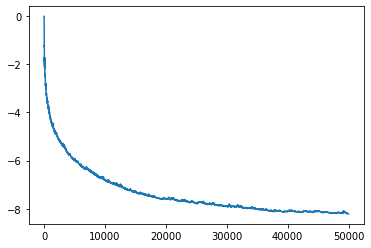

In [7]:
agent = sarsa.SarsaAgent(env_S, alpha=2/3, gamma=0.9, epsilon=0.1)
agent.Q = np.zeros((env_S.n_states, env_S.n_actions))
start_S = (0, 0, 6, 5, 0)
N = 50000
V_convergence = np.empty(N)
for i in range(N):
    path_S, policy, Q = env_S.sarsa_learning(start_S, sarsa_agent=agent)
    V_convergence[i] = max(Q[env_S.map[(0, 0, 6, 5, 0)], :])
    if i % 1000 == 0:
        print(i, V_convergence[i])
plt.plot(V_convergence)
plt.show()

3) where the exploration parameter decreases in each episode, solve for $\epsilon = 0.2$, initialize $Q$ with zero matrix:

0 0.0
1000 -4.227456376682373
2000 -4.895863911818172
3000 -5.264338193965027
4000 -5.544147375726799
5000 -5.891569593057438
6000 -6.02391458644049
7000 -6.163047145665705
8000 -6.315018239073505
9000 -6.4128647217490435
10000 -6.482623205428644
11000 -6.599332615943307
12000 -6.6687991748844535
13000 -6.6929202161323085
14000 -6.835996274352251
15000 -6.865219728613146
16000 -6.942392078018692
17000 -6.9968124352014085
18000 -7.026130154825158
19000 -7.108244050986574
20000 -7.150326558466922
21000 -7.137501212997531
22000 -7.172290855229973
23000 -7.205917291975301
24000 -7.201067555068339
25000 -7.293459639545137
26000 -7.302521950125333
27000 -7.332038942039153
28000 -7.3953894915865686
29000 -7.4065776234660206
30000 -7.437682100321729
31000 -7.42888715426468
32000 -7.471874393071814
33000 -7.453842639583038
34000 -7.497668113764288
35000 -7.509370707091196
36000 -7.518516052719005
37000 -7.558034984953983
38000 -7.566988288337189
39000 -7.574847106733482
40000 -7.558367225613727

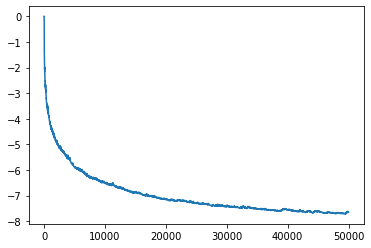

In [14]:
delta = 0.7
agent = sarsa.SarsaAgent(env_S, alpha=2/3, gamma=0.9, epsilon=1)
agent.Q = np.zeros((env_S.n_states, env_S.n_actions))
start_S = (0, 0, 6, 5, 0)
N = 50000
V_convergence = np.empty(N)
for i in range(N):
    agent.epsilon = 1 / ((i + 1)**delta)
    path_S, policy, Q = env_S.sarsa_learning(start_S, sarsa_agent=agent)
    V_convergence[i] = max(Q[env_S.map[(0, 0, 6, 5, 0)], :])
    if i % 1000 == 0:
        print(i, V_convergence[i])
plt.plot(V_convergence)
plt.show()

In [ ]:
method = 'ValIter'
start_S = (0,0,6,5,0)
path_S = env_S.simulate(start_S, policy, method)

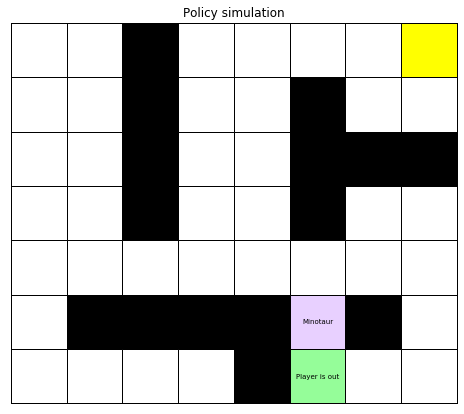

In [6]:
mz_k.animate_solution(maze_S, path_S)